In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv('heart_disease_uci(1).csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [32]:
df.shape

(920, 16)

**3)Data Cleaning**

In [34]:
df = df.drop_duplicates()

In [35]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [36]:
df.info

<bound method DataFrame.info of       id  age     sex        dataset               cp  trestbps   chol    fbs  \
0      1   63    Male      Cleveland   typical angina     145.0  233.0   True   
1      2   67    Male      Cleveland     asymptomatic     160.0  286.0  False   
2      3   67    Male      Cleveland     asymptomatic     120.0  229.0  False   
3      4   37    Male      Cleveland      non-anginal     130.0  250.0  False   
4      5   41  Female      Cleveland  atypical angina     130.0  204.0  False   
..   ...  ...     ...            ...              ...       ...    ...    ...   
915  916   54  Female  VA Long Beach     asymptomatic     127.0  333.0   True   
916  917   62    Male  VA Long Beach   typical angina       NaN  139.0  False   
917  918   55    Male  VA Long Beach     asymptomatic     122.0  223.0   True   
918  919   58    Male  VA Long Beach     asymptomatic       NaN  385.0   True   
919  920   62    Male  VA Long Beach  atypical angina     120.0  254.0  False   

              restecg  thalch  exang  oldpeak        slope   ca  \
0      lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1      lv hypertrophy   108.0   True      1.5         flat  3.0   
2      lv hypertrophy   129.0   True      2.6         flat  2.0   
3              normal   187.0  False      3.5  downsloping  0.0   
4      lv hypertrophy   172.0  False      1.4    upsloping  0.0   
..                ...     ...    ...      ...          ...  ...   
915  st-t abnormality   154.0  False      0.0          NaN  NaN   
916  st-t abnormality     NaN    NaN      NaN          NaN  NaN   
917  st-t abnormality   100.0  False      0.0          NaN  NaN   
918    lv hypertrophy     NaN    NaN      NaN          NaN  NaN   
919    lv hypertrophy    93.0   True      0.0          NaN  NaN   

                  thal  num  
0         fixed defect    0  
1               normal    2  
2    reversable defect    1  
3               normal    0  
4               normal    0  
..                 ...  ...  
915                NaN    1  
916                NaN    0  
917       fixed defect    2  
918                NaN    0  
919                NaN    1  

[920 rows x 16 columns]>

In [37]:
df.isna().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [ ]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0


In [38]:
mean_columns = ['trestbps', 'chol', 'thalch', 'oldpeak', 'ca']

mode_columns = ['fbs', 'restecg', 'exang', 'slope', 'thal']

# Impute using mean for numeric columns
for col in mean_columns:
        df[col].fillna(df[col].mean(), inplace=True)

# Impute using mode for categorical columns
for col in mode_columns:
        df[col].fillna(df[col].mode()[0], inplace=True)

<ipython-input-38-54c8bb0643d0>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
<ipython-input-38-54c8bb0643d0>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

In [39]:
df.isnull().sum()


,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0


In [40]:
#Finding average cholestrol of age groups

age_chol = df.groupby("age")["chol"].mean().reset_index()
age_chol.columns = ["age", "avg_chol"]

# Merge with the original dataset
merged_df = df.merge(age_chol, on="age", how="left")

# View the result
print(merged_df[["age", "avg_chol"]].head())

   age    avg_chol
0   63  157.600000
1   67  254.866667
2   67  254.866667
3   37  233.727273
4   41  216.500000


In [41]:
# Creating a dataframe which is separated into patients with no heart disease and those with diseases.
has_disease = df[df["num"] > 0]
no_disease = df[df["num"] == 0]

# Concatenate them back together
concat_df = pd.concat([has_disease, no_disease])

# Print rows where 'num' is 0 directly from concat_df
print(concat_df[concat_df["num"] > 0][["age", "num"]].head())
# print(concat_df[concat_df["num"] == 0][["age", "num"]].head())

   age  num
1   67    2
2   67    1
6   62    3
8   63    2
9   53    1


In [42]:
col_name =	['chol','thalch','oldpeak','trestbps','ca']

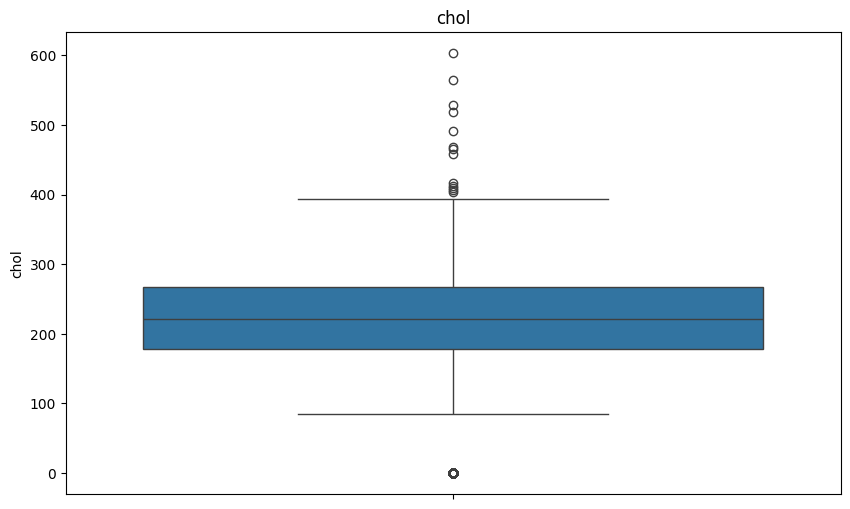

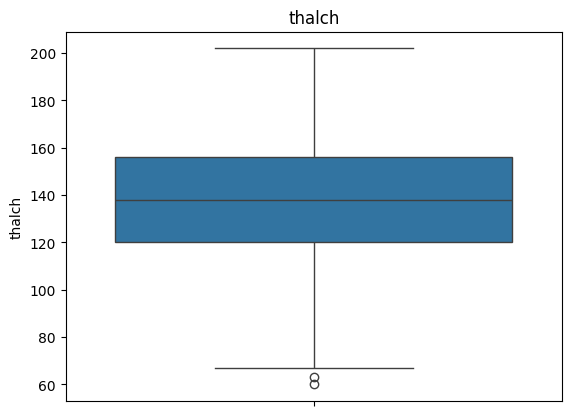

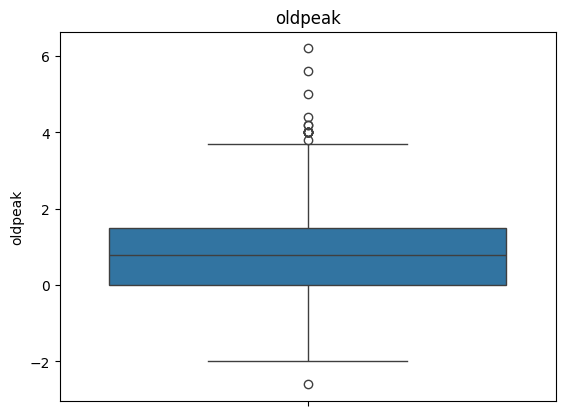

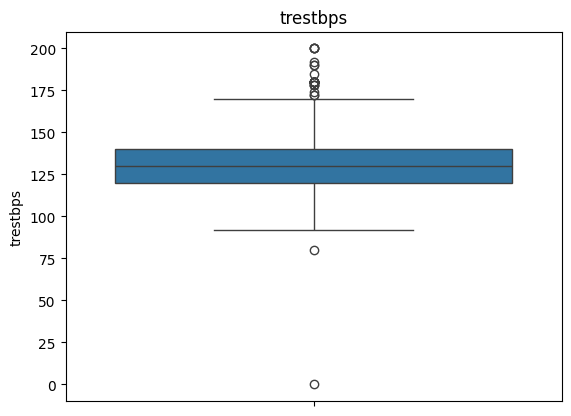

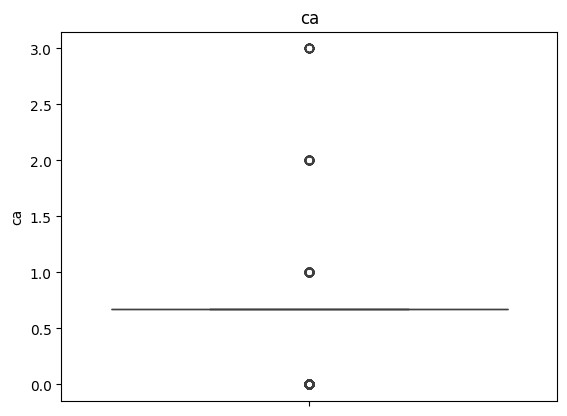

In [43]:
 plt.figure(figsize=(10,	6))		#	Adjust	the	figure	size	if	needed
 for col in	col_name:
     sns.boxplot(data=df[col])
     plt.title(col)
     plt.show()

In [44]:
def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    threshold = 2.0 * IQR
    outlier_mask = (column < Q1 - threshold) | (column > Q3 + threshold)
    return column[~outlier_mask]

In [45]:
for col in col_name:
    df[col] = remove_outliers(df[col])

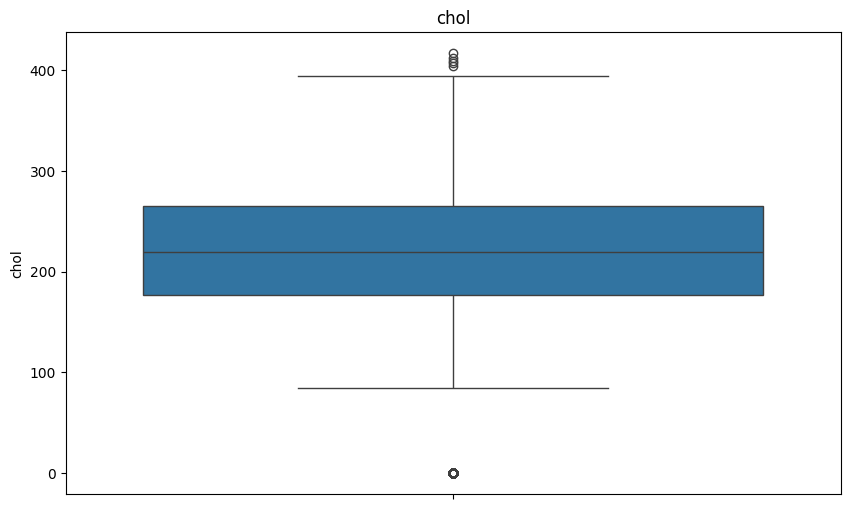

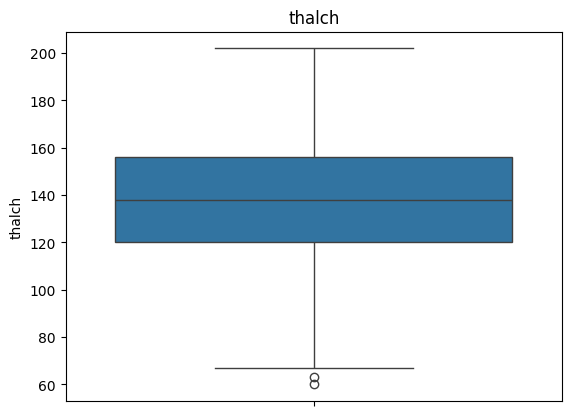

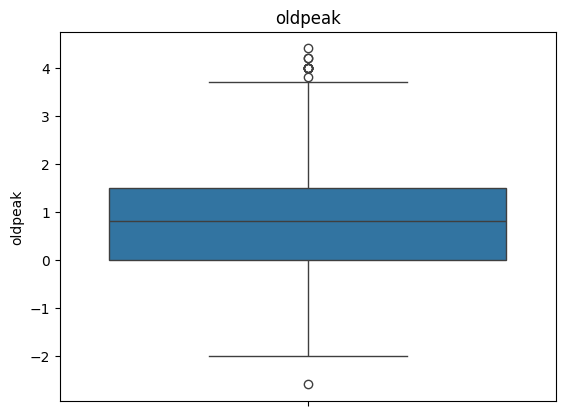

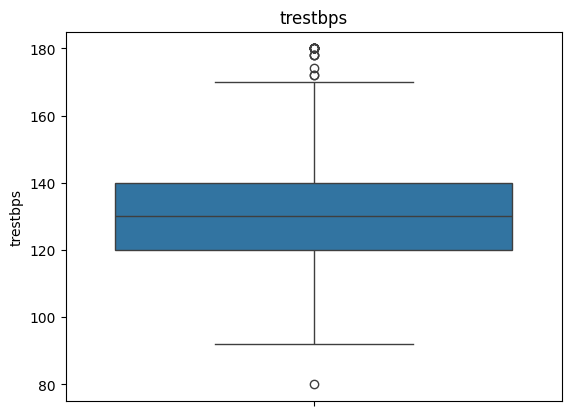

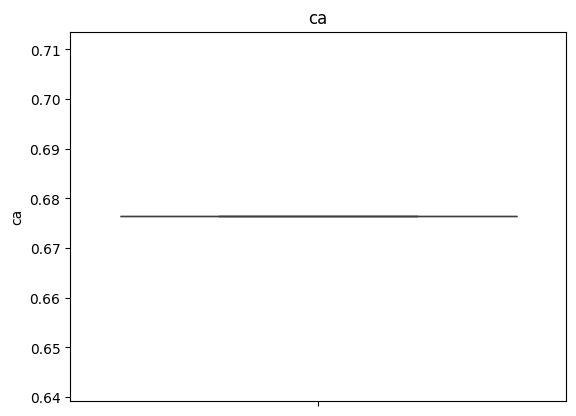

In [46]:
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

for col in col_name:
    sns.boxplot(data=df[col])
    plt.title(col)
    plt.show()

In [47]:
# Before calculating correlations, select only numeric columns
numeric_df = df.select_dtypes(include=np.number)

correlations = numeric_df.corr()['num'].drop('num')

correlations

,num
id,0.273552
age,0.339596
trestbps,0.112967
chol,-0.229408
thalch,-0.351055
oldpeak,0.419173
ca,NaN


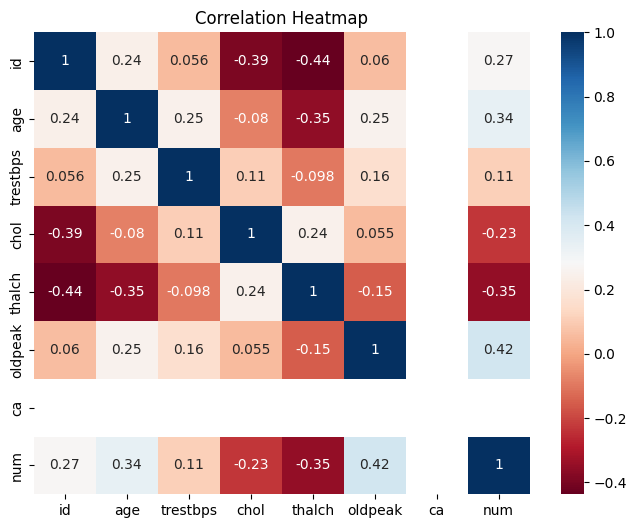

In [48]:
#correlation heatmap using the numeric DataFrame
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='RdBu')
plt.title('Correlation Heatmap')
plt.show()

In [49]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Initialize LabelEncoder and StandardScaler
label_encoder = LabelEncoder()
scaler = StandardScaler()

# List of categorical columns for label encoding
categorical_cols = ['sex', 'dataset', 'cp', 'restecg', 'slope', 'thal']

numeric_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']

# Standardize numeric columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Apply Label Encoding to categorical columns
for col in categorical_cols:
    if col in df.columns:
        df[col] = label_encoder.fit_transform(df[col])

#will throw an error if no for-loop for label_encoder.

In [50]:
# Final DataFrame
print("Processed DataFrame:")
print(df)

Processed DataFrame:
      id       age  sex  dataset  cp  trestbps      chol    fbs  restecg  \
0      1  1.007386    1        0   3  0.780317  0.347921   True        0   
1      2  1.432034    1        0   0  1.662275  0.851531  False        0   
2      3  1.432034    1        0   0 -0.689612  0.309913  False        0   
3      4 -1.752828    1        0   2 -0.101641  0.509456  False        1   
4      5 -1.328180    0        0   1 -0.101641  0.072361  False        0   
..   ...       ...  ...      ...  ..       ...       ...    ...      ...   
915  916  0.051927    0        3   0 -0.278032  1.298129   True        2   
916  917  0.901224    1        3   3  0.023739 -0.545275  False        2   
917  918  0.158089    1        3   0 -0.572018  0.252900   True        2   
918  919  0.476575    1        3   0  0.023739  1.792238   True        0   
919  920  0.901224    1        3   1 -0.689612  0.547465  False        0   

       thalch  exang   oldpeak  slope            ca  thal  num  
0

In [51]:
# In some of the features, there is space will will create problem later on.
# So we rename those attributes to handle problems in the future.
df['thal'].replace({'fixed defect':'fixed_defect' , 'reversable defect': 'reversable_defect' }, inplace =True)
df['cp'].replace({'typical angina':'typical_angina', 'atypical angina': 'atypical_angina' }, inplace =True)
df['restecg'].replace({'normal': 'normal' , 'st-t abnormality': 'ST-T_wave_abnormality' , 'lv hypertrophy': 'left_ventricular_hypertrophy' }, inplace =True)

# Genrating New Dataset with Less Columns Which Are Necessary .
data_1 = df[['age','sex','cp','dataset', 'trestbps', 'chol', 'fbs','restecg' , 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal']].copy()
# Some Changes in Target Variable | Only Two Categories (0,1) . 0 for No-Disease , 1 for Disease
data_1['target'] = ((df['num'] > 0)*1).copy()
# Encoding Sex
data_1['sex'] = (df['sex'] == 'Male')*1
# Encoding Fbs and exang
data_1['fbs'] = (df['fbs'])*1
data_1['exang'] = (df['exang'])*1
# Renaming COlumns Names.
data_1.columns = ['age', 'sex', 'chest_pain_type','country' ,'resting_blood_pressure',
              'cholesterol', 'fasting_blood_sugar','Restecg',
              'max_heart_rate_achieved', 'exercise_induced_angina',
              'st_depression', 'st_slope_type', 'num_major_vessels',
              'thalassemia_type', 'target']
# Load Data Sample
data_1.head()

<ipython-input-51-a4b3666a6e3f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['thal'].replace({'fixed defect':'fixed_defect' , 'reversable defect': 'reversable_defect' }, inplace =True)
<ipython-input-51-a4b3666a6e3f>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

,age,sex,chest_pain_type,country,resting_blood_pressure,cholesterol,fasting_blood_sugar,Restecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope_type,num_major_vessels,thalassemia_type,target
0,1.007386,0,3,0,0.780317,0.347921,1,0,0.495698,0,1.409494,0,NaN,0,0
1,1.432034,0,0,0,1.662275,0.851531,0,0,-1.175955,1,0.624620,1,NaN,1,1
2,1.432034,0,0,0,-0.689612,0.309913,0,0,-0.340128,1,1.703822,1,NaN,2,1
3,-1.752828,0,2,0,-0.101641,0.509456,0,1,1.968345,0,2.586805,0,NaN,1,0
4,-1.328180,0,1,0,-0.101641,0.072361,0,0,1.371326,0,0.526511,2,NaN,1,0


In [52]:
X = data_1.drop('target',axis=1)
y = data_1['target']

# Encode X using data seperate label encoder for all categorical columns
label_encoder = LabelEncoder()

for col in X.columns:
    if X[col].dtype == 'object'  or X[col].dtype == 'category':
        X[col] = label_encoder.fit_transform(X[col])
    else:
        pass

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [53]:
from sklearn.model_selection import train_test_split

# For classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, r2_score


In [54]:
models = [
    ('LogisticRegression', LogisticRegression(random_state=10)),
    ('SVM', SVC(random_state=42, probability=True)),
    ('DecisionTreeClassifier', DecisionTreeClassifier(random_state=10)),

    ('KNeighborsClassifier', KNeighborsClassifier()),

]

In [55]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # Or 'median', 'most_frequent'
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [56]:
# Store model scores
model_scores = []

# Loop through each model
for name, model in models:
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate basic metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    # Save scores
    model_scores.append((name, accuracy, f1, precision, recall))

    # Print results
    print(f"{name} Results:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print("-" * 50)

LogisticRegression Results:
Accuracy: 0.78
F1 Score: 0.78
Precision: 0.78
Recall: 0.78
--------------------------------------------------
SVM Results:
Accuracy: 0.76
F1 Score: 0.76
Precision: 0.76
Recall: 0.76
--------------------------------------------------
DecisionTreeClassifier Results:
Accuracy: 0.70
F1 Score: 0.70
Precision: 0.70
Recall: 0.70
--------------------------------------------------
KNeighborsClassifier Results:
Accuracy: 0.74
F1 Score: 0.74
Precision: 0.74
Recall: 0.74
--------------------------------------------------
